# DIABETIC RETINOPATHY PREDICTION IN PATIENTS


##### Predicting Diabetic Retinopathy Disease based on 
###### 1. ID -  Unique Identifier
###### 2. Age - Patient Age
###### 3. Systolic Blood Pressure - ideal(<120mmHg) when value exceeds more than 120mmHg - damages arteries faster
###### 4. Diastolic Blood Pressure -ideal (<80mmHg) when value gets more than 80mmHg - indicates artery stiffness.
###### 5. Cholestrol Levels - ideal (125 -200 mg/dl) 
###### 6. Prognosis - Target Value (1 = Diabetic_Retinopathy, 0 = No_Diabetic Retinopathy)





### Exploratory Data Analysis(EDA) :

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

### The data 
Let's start by reading in the pronostico_dataset (1).csv file into a pandas dataframe.

In [3]:
#Load the data
data= pd.read_csv("pronostico_dataset (1).csv")
data

,ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis
0,0;77.196339508802097;85.288742418610894;80.021...
1,1;63.5298502234171;99.379735822841894;84.85236...
2,2;69.003986220296298;111.349455002811;109.8506...
3,3;82.638209813584396;95.056127546033593;79.666...
4,4;78.346285672257494;109.154590823354;90.71322...
...,...
5995,5995;49.611850239536302;94.857639409400207;86....
5996,5996;63.099686031701999;100.039527119618;93.51...
5997,5997;55.562242769599898;98.421446235450603;102...
5998,5998;63.468956315401201;106.809288900789;88.06...


In [4]:
#Delimiter is a character that separates values or splits strings

data = pd.read_csv("pronostico_dataset (1).csv", delimiter=';')        

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [6]:
data.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [7]:
data.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [8]:
data[0:11]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
5,5,52.181782,121.080264,110.488129,115.468279,retinopathy
6,6,68.722144,115.232290,92.730813,106.784960,retinopathy
7,7,58.716578,98.653683,94.172130,100.829654,retinopathy
8,8,59.121758,102.681371,96.991612,106.331045,retinopathy
9,9,63.624683,96.341053,80.919213,121.558605,retinopathy


### Data Cleaning

Data Cleaning improves the quality of analysis by reducing errors, missing values, and inconsistencies.

In [9]:
data.isnull()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5995,False,False,False,False,False,False
5996,False,False,False,False,False,False
5997,False,False,False,False,False,False
5998,False,False,False,False,False,False


In [10]:
data.isnull().sum()              

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [11]:
data[data.duplicated()]                    #find duplicate rows

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [12]:
print(data.duplicated().sum())            # Count of duplicate rows

0


In [13]:
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


### Data Visualizations
Data visualization transforms complex data into accessible visual formats, enabling better understanding, decision-making, and communication across various fields.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

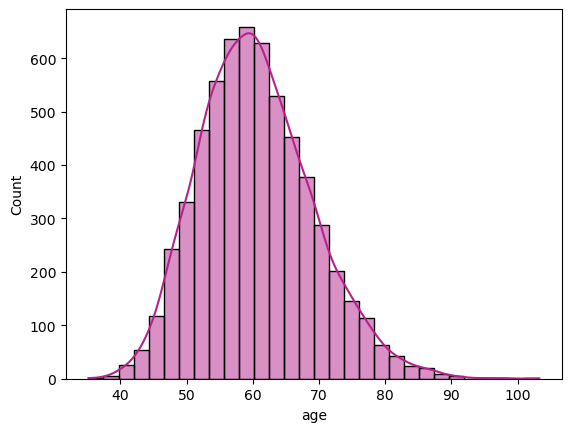

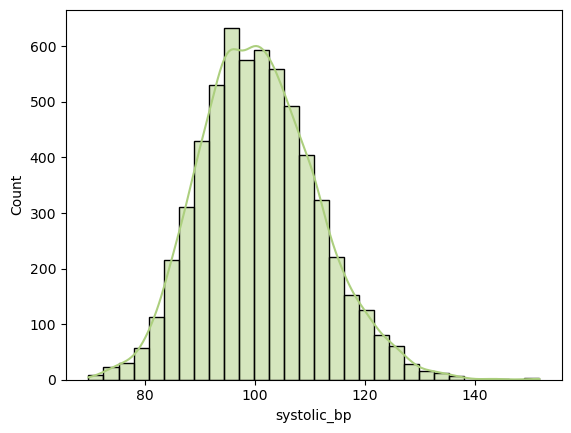

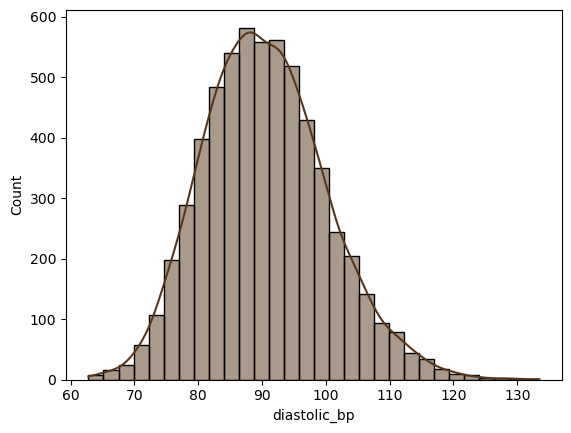

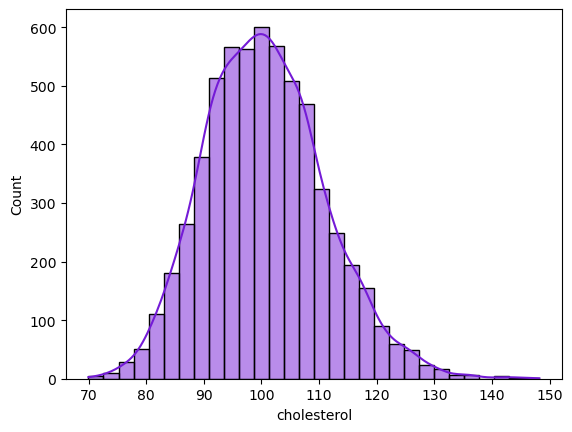

In [15]:
# Let's remove ID and prognosis columns temporarily
import random

data_temp = data.drop(columns=['ID', 'prognosis'])
for feature in data_temp:
  random_color = (random.random(), random.random(), random.random())
  sns.histplot(data[feature], kde=True, bins=30, color=random_color)
  plt.show()

#### The above figures look like normal distribution with right skewness

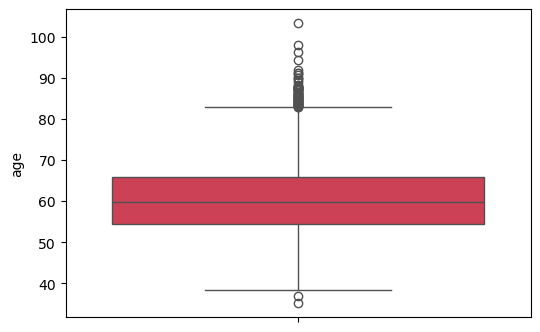

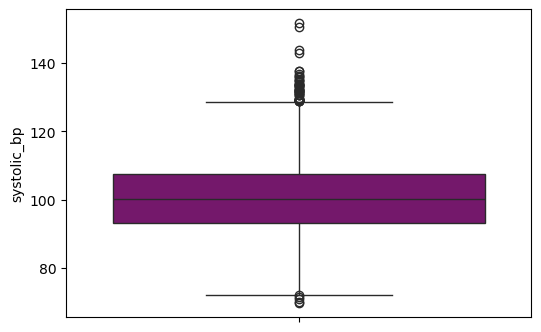

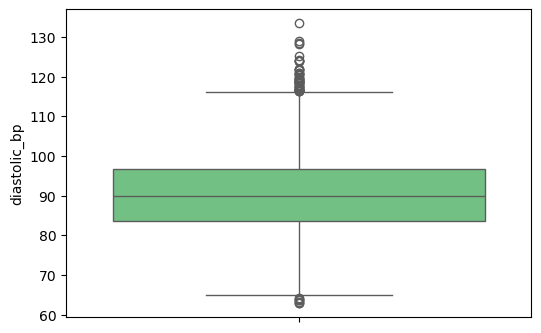

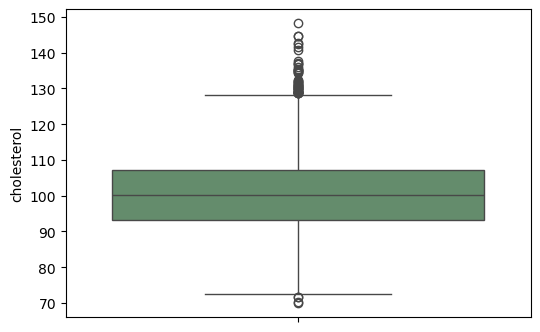

In [16]:
# For skewness and outliers let's boxplot
for feature in data_temp:
  figure = plt.figure(figsize=(6,4))
  random_color = (random.random(), random.random(), random.random())
  sns.boxplot(data_temp[feature],color=random_color)
  plt.show()

#### From the above figures we can detect the outliers

In [17]:
# let's remove those outliers
for feature in data_temp:
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_cleaned = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [18]:
data_cleaned

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


##### We removed the values outside these bounds and stored

In [19]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5946 non-null   int64  
 1   age           5946 non-null   float64
 2   systolic_bp   5946 non-null   float64
 3   diastolic_bp  5946 non-null   float64
 4   cholesterol   5946 non-null   float64
 5   prognosis     5946 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 325.2+ KB


In [20]:
data_cleaned.shape

(5946, 6)

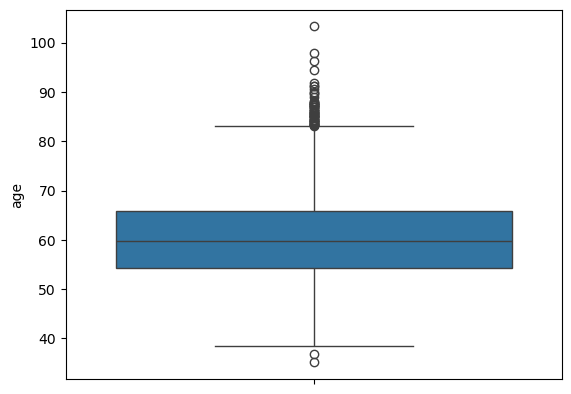

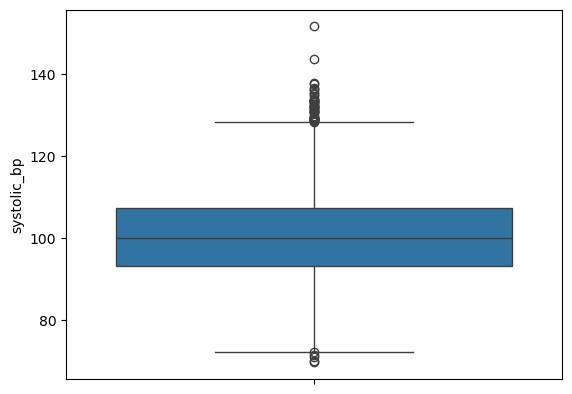

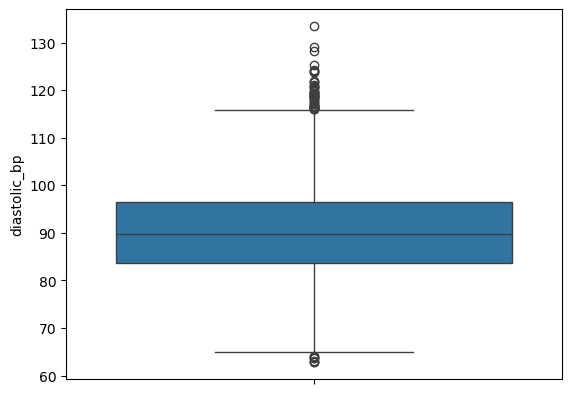

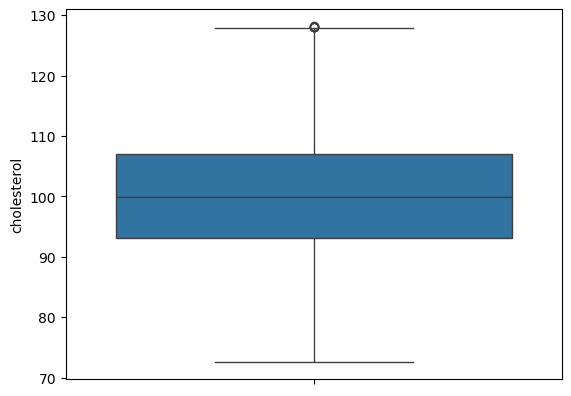

In [21]:
# Next let's visualise them
data_temp2 = data_cleaned.drop(columns=['ID', 'prognosis'])
for feature in data_temp2:
  sns.boxplot(data_temp2[feature])
  plt.show()

#### Correlation

In [22]:
#Correlation
data_temp2.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.013811,-0.004043,-0.000652
systolic_bp,0.013811,1.000000,0.397844,0.392816
diastolic_bp,-0.004043,0.397844,1.000000,0.382441
cholesterol,-0.000652,0.392816,0.382441,1.000000


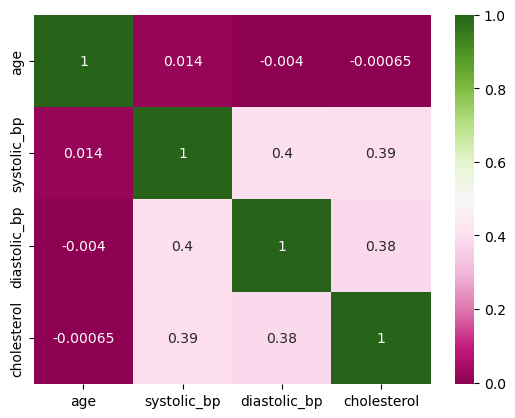

In [23]:
# Let's visualize the correlation
sns.heatmap(data_temp2.corr(), annot=True, cmap="PiYG")
plt.show()

##### Here we can understood the +ve correlation and -ve correlation between them

In classification algorithms the outputs are 0 and 1 as we know.

The prognosis column has to be encoded to make the true value 1 as Retinopathy and False value 0 as No_Retinopathy.

In [24]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [25]:
le = LabelEncoder()
le

LabelEncoder()

In [26]:
columns_to_be_label_encoded =['prognosis']

In [27]:
for i in columns_to_be_label_encoded:
    data_cleaned[i] = le.fit_transform(data_cleaned[i])

In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5946 non-null   int64  
 1   age           5946 non-null   float64
 2   systolic_bp   5946 non-null   float64
 3   diastolic_bp  5946 non-null   float64
 4   cholesterol   5946 non-null   float64
 5   prognosis     5946 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 325.2 KB


In [29]:
data_cleaned['prognosis'].value_counts()

prognosis
1    3040
0    2906
Name: count, dtype: int64

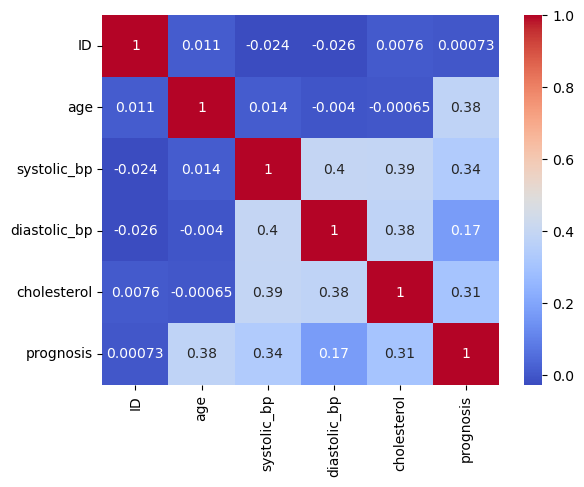

In [30]:
sns.heatmap(data_cleaned.corr(), annot = True, cmap="coolwarm")
plt.show()

In [31]:
data_cleaned.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [32]:
# before we perform scaling we remove column? ID
data_cleaned=data_cleaned.drop(columns=['ID'])

In [33]:
data_cleaned[0:11]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
5,52.181782,121.080264,110.488129,115.468279,1
6,68.722144,115.232290,92.730813,106.784960,1
7,58.716578,98.653683,94.172130,100.829654,1
8,59.121758,102.681371,96.991612,106.331045,1
9,63.624683,96.341053,80.919213,121.558605,1


In [34]:
# No 0's? Let's check again
data_cleaned.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1
5999,62.506825,96.900784,86.878033,108.625436,0


#### Scaling

In [35]:
from sklearn.model_selection import train_test_split

x = data_cleaned.drop(columns=['prognosis'])
y = data_cleaned['prognosis']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
x_train_scaled.shape

(4756, 4)

In [39]:
x_test_scaled.shape

(1190, 4)

### Model Building:
##### Logistic Regression
##### Decision Tree
##### Support Vector Machine
##### K-Nearest Neighbors
##### Random Forest
##### LGBoost

### 1. Logistic Regression :

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred_lr = model.predict(x_test_scaled)
y_pred_lr

array([0, 1, 0, ..., 1, 1, 1])

In [42]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Overall metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("Overall Evaluation Metrics:")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1 Score   : {f1:.4f}")

# Classification report (per class)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Overall Evaluation Metrics:
Accuracy   : 0.7504
Precision  : 0.7504
Recall     : 0.7504
F1 Score   : 0.7504

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       604
           1       0.75      0.75      0.75       586

    accuracy                           0.75      1190
   macro avg       0.75      0.75      0.75      1190
weighted avg       0.75      0.75      0.75      1190



<Axes: >

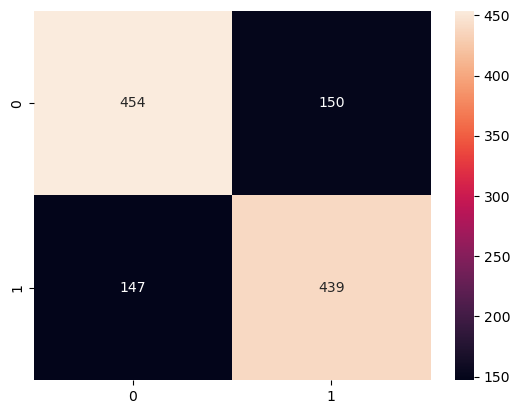

In [43]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True,fmt='g')

#### Logistic Regression - Accuracy Rate : 75%

### 2. Decision Tree :

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=35)
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [45]:
y_pred_dt = dt.predict(x_test_scaled)
y_pred_dt

array([0, 1, 0, ..., 1, 1, 0])

In [46]:
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7361344537815127

In [47]:
from sklearn.metrics import classification_report

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       604
           1       0.72      0.77      0.74       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190



#### HyperParameterTuning Method for Decision Tree:

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {
    'criterion' : ['gini', 'entropy'],  ## bcoz of classifier - precision, recall,f1 score, support, accuracy
    'max_depth' : [3,5,7,9,11],     ## Randomly mention any number 
    'splitter' :['best','random']   ## best- choose the best value, random- random value is selected 
}

In [50]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,    ## gridsearchcv= find the best parms & boost the accuray of model
                   verbose=1)

In [51]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [52]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [53]:
best_dt = grid.best_estimator_

In [54]:
# Predict with best model.  
y_pred_dt = best_dt.predict(x_test_scaled)
y_pred_dt

array([0, 1, 0, ..., 1, 1, 1])

In [55]:
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7369747899159664

In [56]:
print(classification_report(y_test,y_pred_dt))   

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       604
           1       0.73      0.73      0.73       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190



<Axes: >

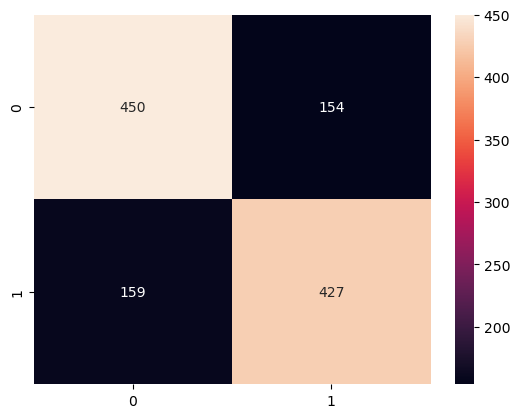

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True,fmt='g')

#### Decision Tree - Accuracy : 73.7%

### 3. SVM :

In [58]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')

svc.fit(x_train_scaled,y_train)


SVC(kernel='poly')

In [59]:
y_pred_svm = svc.predict(x_test_scaled)
y_pred_svm

array([0, 1, 0, ..., 1, 1, 1])

In [60]:
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.7436974789915967

In [61]:
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       604
           1       0.73      0.75      0.74       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190



####  HyperParameterTuning Method For SVM :

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution 
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'degree': [2, 3]  # Only used for 'poly' kernel
}

In [63]:
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=10,               # Try 10 random combinations
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,               # Use all available CPU cores
    random_state=42          # Reproducibility
)


In [66]:
random_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3],
                                        'gamma': ['scale', 'auto', 0.01, 0.001],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=1)

In [67]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 0.1}


In [68]:
best_model = random_search.best_estimator_

In [69]:
# Predict with best model.  
y_pred_svm = best_model.predict(x_test_scaled)
y_pred_svm

array([0, 1, 0, ..., 1, 1, 1])

In [71]:
# Overall metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("Overall Evaluation Metrics:")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1 Score   : {f1:.4f}")

Overall Evaluation Metrics:
Accuracy   : 0.7487
Precision  : 0.7505
Recall     : 0.7487
F1 Score   : 0.7485


In [72]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Confusion Matrix:
 [[432 172]
 [127 459]]


In [73]:
# Classification report (per class)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       604
           1       0.73      0.78      0.75       586

    accuracy                           0.75      1190
   macro avg       0.75      0.75      0.75      1190
weighted avg       0.75      0.75      0.75      1190



#### SVM - Accuracy Rate : 75%

### 4. K-Nearest Neighbors(KNN) :

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

#### HyperParameterTuning Method:

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [76]:
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1                  # Use all CPU cores
)

grid_knn.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [77]:
print("Best Parameters:", grid_knn.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [78]:
best_knn = grid_knn.best_estimator_

In [79]:
y_pred_k = best_knn.predict(x_test_scaled)
y_pred_k

array([0, 1, 0, ..., 1, 1, 0])

In [80]:
print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_k))

KNN:
Accuracy: 0.7352941176470589


In [81]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       604
           1       0.72      0.76      0.74       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190



#### KNN : Accuracy Rate - 73.5%

### 5. RandomForestClassifier :

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_rf = rf.predict(x_test_scaled)
y_pred_rf

array([0, 1, 0, ..., 0, 1, 1])

In [84]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.7436974789915967

In [85]:
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       604
           1       0.73      0.75      0.74       586

    accuracy                           0.74      1190
   macro avg       0.74      0.74      0.74      1190
weighted avg       0.74      0.74      0.74      1190



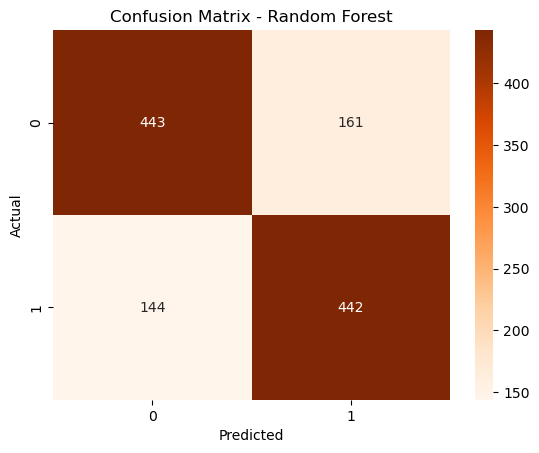

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

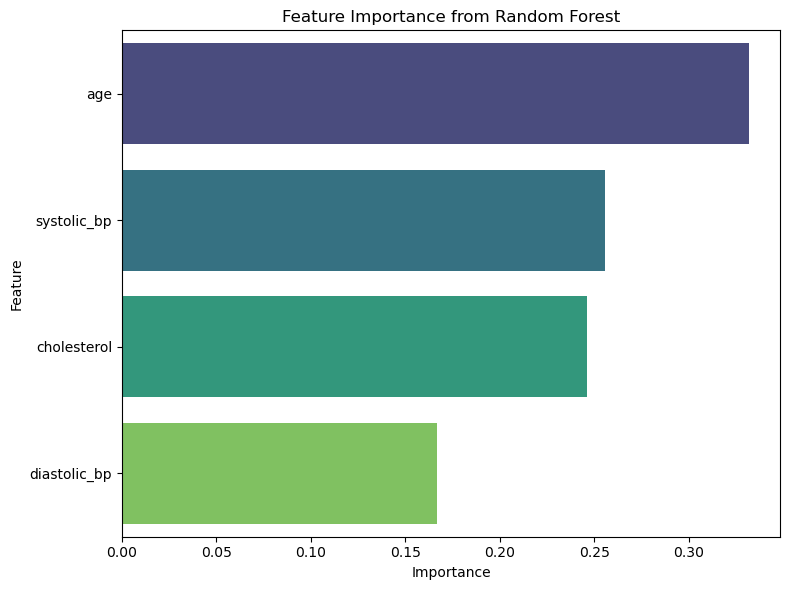

In [87]:
# Get feature importances and feature names
importances = rf.feature_importances_
features = x.columns

# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

#### RFC - Accuracy : 74.3%

### 6. LightGBM (LGBM) Classifier :

In [88]:
!pip install lightgbm

In [89]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 2454, number of negative: 2302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4756, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515980 -> initscore=0.063941
[LightGBM] [Info] Start training from score 0.063941


LGBMClassifier(random_state=42)

In [90]:
y_pred_lgb = lgb_model.predict(x_test_scaled)
y_pred_lgb

array([0, 1, 0, ..., 1, 1, 0])

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))

Accuracy: 0.746218487394958


In [92]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       604
           1       0.73      0.78      0.75       586

    accuracy                           0.75      1190
   macro avg       0.75      0.75      0.75      1190
weighted avg       0.75      0.75      0.75      1190



In [93]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))


Confusion Matrix:
 [[432 172]
 [130 456]]


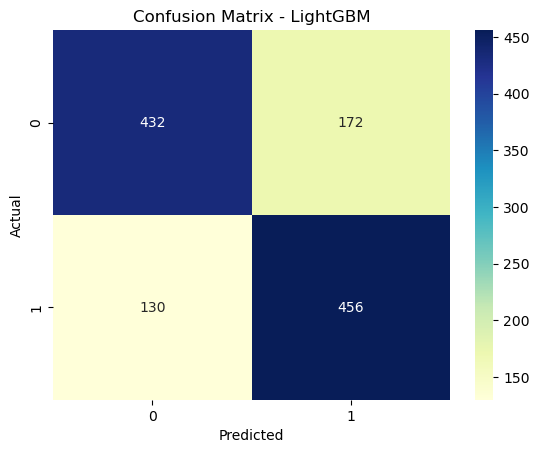

In [94]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### LGBOOST - Accuracy Rate : 74.6%

In [95]:
models_predictions = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "SVM": y_pred_svm,
    "KNN": y_pred_k,
    "Random Forest": y_pred_rf,
    "LightGBM": y_pred_lgb 
}

results = []
for model_name, y_pred in models_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": model_name, "Accuracy": acc})

accuracy_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(accuracy_df)

                 Model  Accuracy
0  Logistic Regression  0.750420
2                  SVM  0.748739
5             LightGBM  0.746218
4        Random Forest  0.743697
1        Decision Tree  0.736975
3                  KNN  0.735294


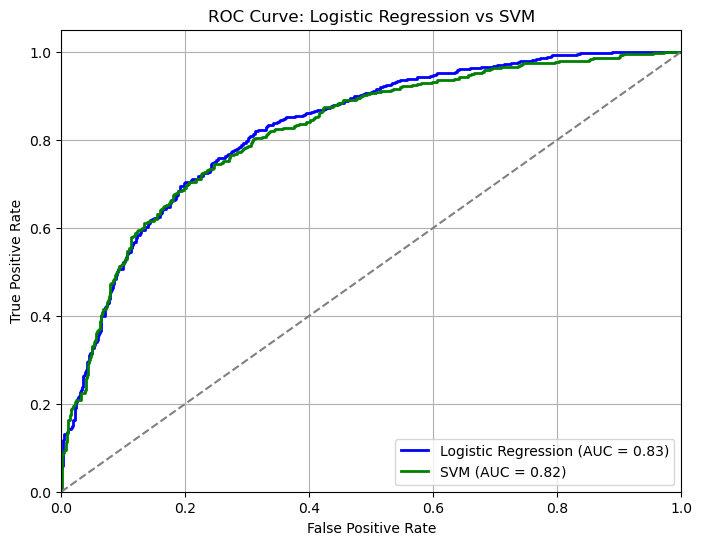

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression (model)
y_prob_logreg = model.predict_proba(x_test_scaled)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# SVM (svc) using decision_function
y_scores_svm = svc.decision_function(x_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression vs SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Model Performance Comparison**

 Model                   | Accuracy   |
| -----------------------| ----------|
| **Logistic Regression**| 0.750     |
| **SVM**                | 0.748     |
| **LG BOOST**           | 0.746     |
| **RFC**                | 0.743     |
| **Decision Tree**      | 0.736     |
| **KNN**                | 0.735     |


**Best Performing Model:** LOGISTIC REGRESSION 

### Deployment 

In [97]:
# Save the model
import joblib
joblib.dump(model, 'logreg_model.pkl')   # Logistic Regression

['logreg_model.pkl']

In [99]:
from joblib import load
logreg_from_joblib = joblib.load('logreg_model.pkl') 